In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import subplots
from racecar.SDRaceCar import SDRaceCar

np.set_printoptions(precision=4, suppress=True)

In [24]:
def getObservation():
    '''
    Returns observations from env
    :rtype: [x, y, theta], [x_dot, y_dot, theta_dot], h
    '''
    obs = env.get_observation()
    return obs[0:3], obs[3:6], obs[6]

def getAction(K_thrust, K_angle, verbose=False):
    '''
    Calculate required thrust and wheel angle to navigate car
    :rtype: np.array of size (2,)
    '''
    pos, vel, h = getObservation()
    x_desired, y_desired = h[0], h[1]
    x, y, theta = pos[0], pos[1], pos[2]
    delta_x, delta_y = x_desired - x, y_desired - y
    
    # Calculated values
    gamma = np.arctan2(delta_y, delta_x) - theta
    delta_v = np.sqrt( (delta_x**2 + delta_y**2)/np.cos(gamma)**2 )
    
    #Control
    thrust = K_thrust * delta_v
    thrust_normalized = (thrust/20 * 2) - 1
    
    if thrust_normalized < -1: thrust_normalized = -1
    if thrust_normalized > 1: thrust_normalized = 1

#     if gamma <= -np.pi/2:
#         angle = gamma + np.pi
#     elif gamma >= np.pi/2:
#         angle = gamma - np.pi
#     else:
#         angle = gamma
    angle = gamma
    if angle < 0: angle += + 2*np.pi
#     angle = K_angle * angle
    if verbose:
        print('Normalized thrust, angle, theta = ', thrust_normalized, angle, theta* 180/np.pi)
    
    return np.array([angle, thrust_normalized]) #size (2,)

Steps taken = 295


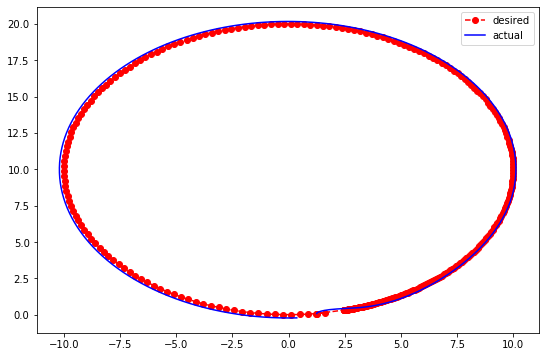

In [28]:
env = SDRaceCar(render_env=False, track='Circle')
state = env.reset()
previous_ind = 0
steps = 0
done = False

plot_track = True
env.x, env.y = state[-1]
actual_traj, desired_traj = [state[-1]], [state[-1]]
while not done:
    action = getAction(K_thrust = 0.9, K_angle = 1.5, verbose=False)
    obs,r,done = env.step(action)
    steps +=1
    current_ind = env.closest_track_ind
    # CONDITION TO CHECK lap-completion
    if current_ind - previous_ind<=-500:
        done = True
    previous_ind = current_ind
    # Plotting
#     print('actual traj = ', obs[0], obs[1])
#     print('desired traj = ', obs[6])
    actual_traj.append([obs[0], obs[1]])
    desired_traj.append(list(obs[6]))

print('Steps taken = {0}'.format(steps))
    
if plot_track:
    fig, ax = subplots(figsize=(9, 6))
    desired_traj, actual_traj = np.array(desired_traj), np.array(actual_traj)
    ax.plot(desired_traj[:,0], desired_traj[:,1], 'or--')
    ax.plot(actual_traj[:,0], actual_traj[:,1], '-b')
    ax.legend(('desired','actual'),loc='best')

In [4]:
env.steer_max

1.047

In [15]:
360 - 346.145

13.855000000000018